In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline

In [2]:
fields_mortality = ['iso_code', 'continent', 'location', 'date', 'total_cases', 
                    'new_cases', 'total_deaths', 'new_deaths', 
                    'total_cases_per_million', 'new_cases_per_million',
                    'total_deaths_per_million','new_deaths_per_million', 'icu_patients',
                    'new_tests','total_tests', 'total_tests_per_thousand',
                    'new_tests_per_thousand', 'stringency_index', 'population', 
                    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                    'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy',
                    'human_development_index']

df = pd.read_csv("owid-covid-data.csv", usecols=fields_mortality)

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [4]:
df.rename(columns={'iso_code' : 'ISO', 'continent': 'REGION', 'location' : 'COUNTRY'},inplace=True)

In [5]:
df.head()

,ISO,REGION,COUNTRY,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [6]:
df.columns = df.columns.str.upper()

In [7]:
df.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,MEDIAN_AGE,AGED_65_OLDER,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [10]:
df.shape

(69175, 30)

In [8]:
df['DATE'] = df['DATE'].astype('datetime64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69175 entries, 0 to 69174
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         69175 non-null  object        
 1   REGION                      65721 non-null  object        
 2   COUNTRY                     69175 non-null  object        
 3   DATE                        69175 non-null  datetime64[ns]
 4   TOTAL_CASES                 68346 non-null  float64       
 5   NEW_CASES                   68344 non-null  float64       
 6   TOTAL_DEATHS                59410 non-null  float64       
 7   NEW_DEATHS                  59568 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     67971 non-null  float64       
 9   NEW_CASES_PER_MILLION       67969 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    59048 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      59206 non-null  float64   

In [17]:
fields_measures = ['ISO','DATE_IMPLEMENTED','CATEGORY','MEASURE']

df2 = pd.read_csv("acaps_covid19_government_measures_dataset_0.csv", usecols=fields_measures)

In [18]:
df2.head()

,ISO,CATEGORY,MEASURE,DATE_IMPLEMENTED
0,MNG,Public health measures,Strengthening the public health system,1/1/2020
1,RUS,Public health measures,Health screenings in airports and border cross...,1/1/2020
2,CIV,Public health measures,Health screenings in airports and border cross...,1/2/2020
3,SGP,Public health measures,Strengthening the public health system,1/2/2020
4,SGP,Public health measures,Awareness campaigns,1/2/2020


In [22]:
df2.rename(columns={'DATE_IMPLEMENTED' : 'DATE'}, inplace=True)

In [23]:
df2.shape

(23923, 4)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23923 entries, 0 to 23922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ISO       23923 non-null  object
 1   CATEGORY  23923 non-null  object
 2   MEASURE   23923 non-null  object
 3   DATE      23630 non-null  object
dtypes: object(4)
memory usage: 747.7+ KB


In [25]:
df2['DATE'] = df2['DATE'].astype('datetime64')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23923 entries, 0 to 23922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ISO       23923 non-null  object        
 1   CATEGORY  23923 non-null  object        
 2   MEASURE   23923 non-null  object        
 3   DATE      23630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 747.7+ KB


In [27]:
df2.head()

,ISO,CATEGORY,MEASURE,DATE
0,MNG,Public health measures,Strengthening the public health system,2020-01-01
1,RUS,Public health measures,Health screenings in airports and border cross...,2020-01-01
2,CIV,Public health measures,Health screenings in airports and border cross...,2020-01-02
3,SGP,Public health measures,Strengthening the public health system,2020-01-02
4,SGP,Public health measures,Awareness campaigns,2020-01-02


In [28]:
frames = [df,df2]
df_merged = reduce(lambda left,right : pd.merge(left,right, on = ['ISO','DATE'], how = 'outer'),frames)

In [29]:
df_merged.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Movement restrictions,Border closure
1,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Public health measures,General recommendations
2,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Governance and socio-economic measures,State of emergency declared
3,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Public health measures,Awareness campaigns
4,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,Movement restrictions,Domestic travel restrictions


In [30]:
df_merged.shape

(83379, 32)

In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83379 entries, 0 to 83378
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         83379 non-null  object        
 1   REGION                      77927 non-null  object        
 2   COUNTRY                     81381 non-null  object        
 3   DATE                        83086 non-null  datetime64[ns]
 4   TOTAL_CASES                 80505 non-null  float64       
 5   NEW_CASES                   80503 non-null  float64       
 6   TOTAL_DEATHS                69563 non-null  float64       
 7   NEW_DEATHS                  69721 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     80130 non-null  float64       
 9   NEW_CASES_PER_MILLION       80128 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    69201 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      69359 non-null  float64   

In [34]:
country_list = ['AUS','USA','IND','CHN','SWE','GBR','KOR','TWN','ITA','PRT']

df3 = df_merged[df_merged['ISO'].isin(country_list)].dropna(thresh = 20)

In [35]:
df3.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
4097,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.157,0.157,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4098,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.196,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4099,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.196,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4100,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.235,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4101,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.353,0.118,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN


In [36]:
df3.shape

(5548, 32)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 4097 to 77965
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         5548 non-null   object        
 1   REGION                      5548 non-null   object        
 2   COUNTRY                     5548 non-null   object        
 3   DATE                        5548 non-null   datetime64[ns]
 4   TOTAL_CASES                 5548 non-null   float64       
 5   NEW_CASES                   5545 non-null   float64       
 6   TOTAL_DEATHS                5273 non-null   float64       
 7   NEW_DEATHS                  5272 non-null   float64       
 8   TOTAL_CASES_PER_MILLION     5548 non-null   float64       
 9   NEW_CASES_PER_MILLION       5545 non-null   float64       
 10  TOTAL_DEATHS_PER_MILLION    5273 non-null   float64       
 11  NEW_DEATHS_PER_MILLION      5272 non-null   float64 

In [38]:
df3.describe()

,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,TOTAL_DEATHS_PER_MILLION,NEW_DEATHS_PER_MILLION,ICU_PATIENTS,NEW_TESTS,...,MEDIAN_AGE,AGED_65_OLDER,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX
count,5.548000e+03,5545.000000,5273.000000,5272.000000,5548.000000,5545.000000,5273.000000,5272.000000,2678.000000,4.234000e+03,...,5548.000000,5183.000000,5548.000000,5183.000000,5548.000000,5183.000000,4.440000e+02,5183.000000,5548.000000,5183.000000
mean,1.185930e+06,11999.740667,33876.238764,253.845789,7055.582002,85.561315,276.171401,2.054624,2801.239358,2.268312e+05,...,40.364852,16.304447,10.579323,35961.467701,145.114656,7.189275,5.955000e+01,3.741615,80.470488,0.881524
std,3.367838e+06,32065.945994,67140.573346,542.570549,13552.183914,193.208869,352.473584,3.916112,4909.181397,4.006648e+05,...,4.784800,4.676192,3.557929,13776.482412,59.104058,2.659231,7.113443e-15,2.817250,3.765782,0.088889
min,1.000000e+00,-161.000000,1.000000,-232.000000,0.001000,-15.789000,0.001000,-22.972000,0.000000,-4.751000e+04,...,28.200000,5.989000,3.414000,6426.674000,85.998000,4.280000,5.955000e+01,0.530000,69.660000,0.645000
25%,1.154100e+04,25.000000,372.000000,1.000000,79.774000,0.378000,3.355000,0.001000,115.000000,1.426700e+04,...,38.300000,13.914000,8.622000,27936.896000,107.791000,4.780000,5.955000e+01,2.540000,78.860000,0.864000
50%,8.149800e+04,426.000000,4638.000000,13.000000,1129.515000,12.305000,64.445000,0.275000,476.000000,4.994100e+04,...,40.800000,15.504000,10.129000,39753.244000,122.137000,6.800000,5.955000e+01,3.180000,81.320000,0.926000
75%,3.669940e+05,6383.000000,40666.000000,224.000000,6048.671500,66.984000,580.234000,2.533500,2963.000000,2.270380e+05,...,43.400000,19.985000,13.433000,44648.710000,151.089000,9.850000,5.955000e+01,3.840000,83.030000,0.932000
max,2.769416e+07,300282.000000,486325.000000,4401.000000,83667.503000,3216.569000,1732.640000,46.934000,23912.000000,2.192115e+06,...,47.900000,23.021000,16.240000,54225.446000,282.280000,10.790000,5.955000e+01,12.270000,83.510000,0.945000


In [39]:
df3

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
4097,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.157,0.157,...,10.129,44648.710,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4098,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.196,0.039,...,10.129,44648.710,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4099,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.196,0.000,...,10.129,44648.710,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4100,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.235,0.039,...,10.129,44648.710,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4101,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.353,0.118,...,10.129,44648.710,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77961,USA,North America,United States,2021-02-11,27392512.0,105353.0,479257.0,3157.0,82756.172,318.284,...,9.732,54225.446,151.089,10.79,NaN,2.77,78.86,0.926,NaN,NaN
77962,USA,North America,United States,2021-02-12,27492023.0,99511.0,482142.0,2885.0,83056.807,300.635,...,9.732,54225.446,151.089,10.79,NaN,2.77,78.86,0.926,NaN,NaN
77963,USA,North America,United States,2021-02-13,27575344.0,83321.0,484301.0,2159.0,83308.530,251.723,...,9.732,54225.446,151.089,10.79,NaN,2.77,78.86,0.926,NaN,NaN
77964,USA,North America,United States,2021-02-14,27640282.0,64938.0,485384.0,1083.0,83504.716,196.186,...,9.732,54225.446,151.089,10.79,NaN,2.77,78.86,0.926,NaN,NaN


In [40]:
df3.isnull().sum()

ISO                              0
REGION                           0
COUNTRY                          0
DATE                             0
TOTAL_CASES                      0
NEW_CASES                        3
TOTAL_DEATHS                   275
NEW_DEATHS                     276
TOTAL_CASES_PER_MILLION          0
NEW_CASES_PER_MILLION            3
TOTAL_DEATHS_PER_MILLION       275
NEW_DEATHS_PER_MILLION         276
ICU_PATIENTS                  2870
NEW_TESTS                     1314
TOTAL_TESTS                   1409
TOTAL_TESTS_PER_THOUSAND      1409
NEW_TESTS_PER_THOUSAND        1314
STRINGENCY_INDEX                49
POPULATION                       0
POPULATION_DENSITY             365
MEDIAN_AGE                       0
AGED_65_OLDER                  365
AGED_70_OLDER                    0
GDP_PER_CAPITA                 365
CARDIOVASC_DEATH_RATE            0
DIABETES_PREVALENCE            365
HANDWASHING_FACILITIES        5104
HOSPITAL_BEDS_PER_THOUSAND     365
LIFE_EXPECTANCY     

In [43]:
categorical_series = df3.select_dtypes(['object']).columns

for item in categorical_series:
    df3[item] = df3[item].astype('category')

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5548 entries, 4097 to 77965
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         5548 non-null   category      
 1   REGION                      5548 non-null   category      
 2   COUNTRY                     5548 non-null   category      
 3   DATE                        5548 non-null   datetime64[ns]
 4   TOTAL_CASES                 5548 non-null   float64       
 5   NEW_CASES                   5545 non-null   float64       
 6   TOTAL_DEATHS                5273 non-null   float64       
 7   NEW_DEATHS                  5272 non-null   float64       
 8   TOTAL_CASES_PER_MILLION     5548 non-null   float64       
 9   NEW_CASES_PER_MILLION       5545 non-null   float64       
 10  TOTAL_DEATHS_PER_MILLION    5273 non-null   float64       
 11  NEW_DEATHS_PER_MILLION      5272 non-null   float64 

#### Univariate Exploration

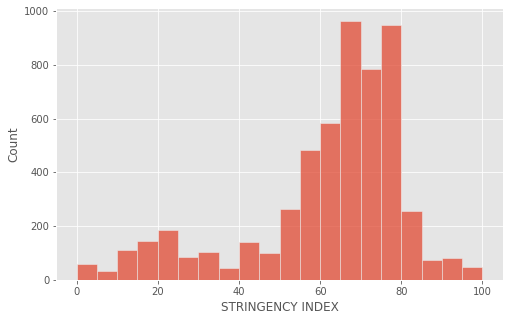

In [61]:
plt.rcParams['figure.figsize'] = (8,5)
plt.style.use('ggplot')
colors = sns.color_palette()[0]
sns.histplot(df3, x = 'STRINGENCY_INDEX', bins = 20, color=colors)
plt.xlabel("STRINGENCY INDEX")
plt.show()

<AxesSubplot:xlabel='STRINGENCY_INDEX'>

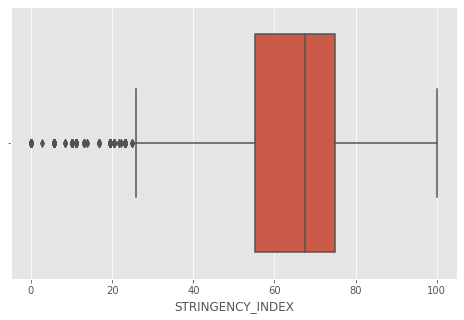

In [68]:
sns.boxplot(data = df3, x = 'STRINGENCY_INDEX')

<AxesSubplot:xlabel='STRINGENCY_INDEX', ylabel='Count'>

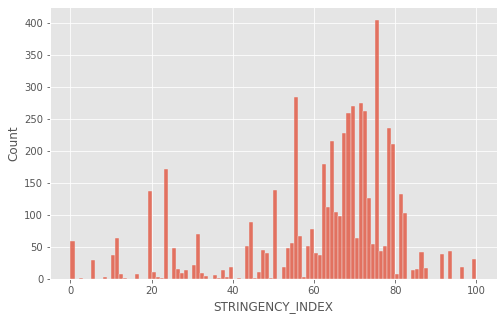

In [71]:
sns.histplot(data = df3, x = 'STRINGENCY_INDEX', bins = 100, color=colors)

In [73]:
df_aus = df3[df3['ISO'] == 'AUS'] 
df_usa = df3[df3['ISO'] == 'USA']
df_india = df3[df3['ISO'] == 'IND']
df_china = df3[df3['ISO'] == 'CHN']
df_sweden = df3[df3['ISO'] == 'SWE']

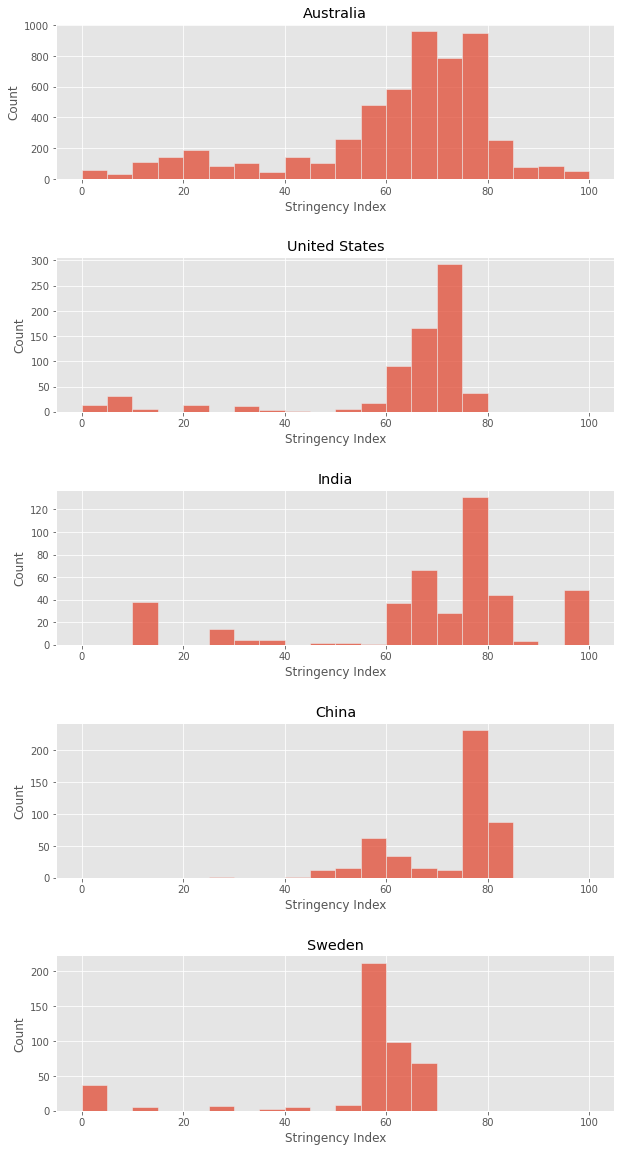

In [83]:
plt.figure(figsize = [10,20])
plt.subplots_adjust(hspace=0.5)
binsize = 5
bins = np.arange(0,df['STRINGENCY_INDEX'].max() + binsize, binsize)

plt.subplot(5,1,1)
sns.histplot(data = df3, x = 'STRINGENCY_INDEX', bins = bins, color = colors)
plt.title("Australia")
plt.xlabel("Stringency Index")

plt.subplot(5,1,2)
sns.histplot(df_usa, x = 'STRINGENCY_INDEX', bins = bins, color = colors)
plt.title("United States")
plt.xlabel('Stringency Index')

plt.subplot(5,1,3)
sns.histplot(df_india, x = 'STRINGENCY_INDEX', bins = bins, color = colors)
plt.title("India")
plt.xlabel("Stringency Index")

plt.subplot(5,1,4)
sns.histplot(df_china, x = 'STRINGENCY_INDEX', bins = bins, color = colors)
plt.title("China")
plt.xlabel("Stringency Index")

plt.subplot(5,1,5)
sns.histplot(df_sweden, x = 'STRINGENCY_INDEX', bins = bins, color = colors)
plt.title("Sweden")
plt.xlabel('Stringency Index')

plt.show()

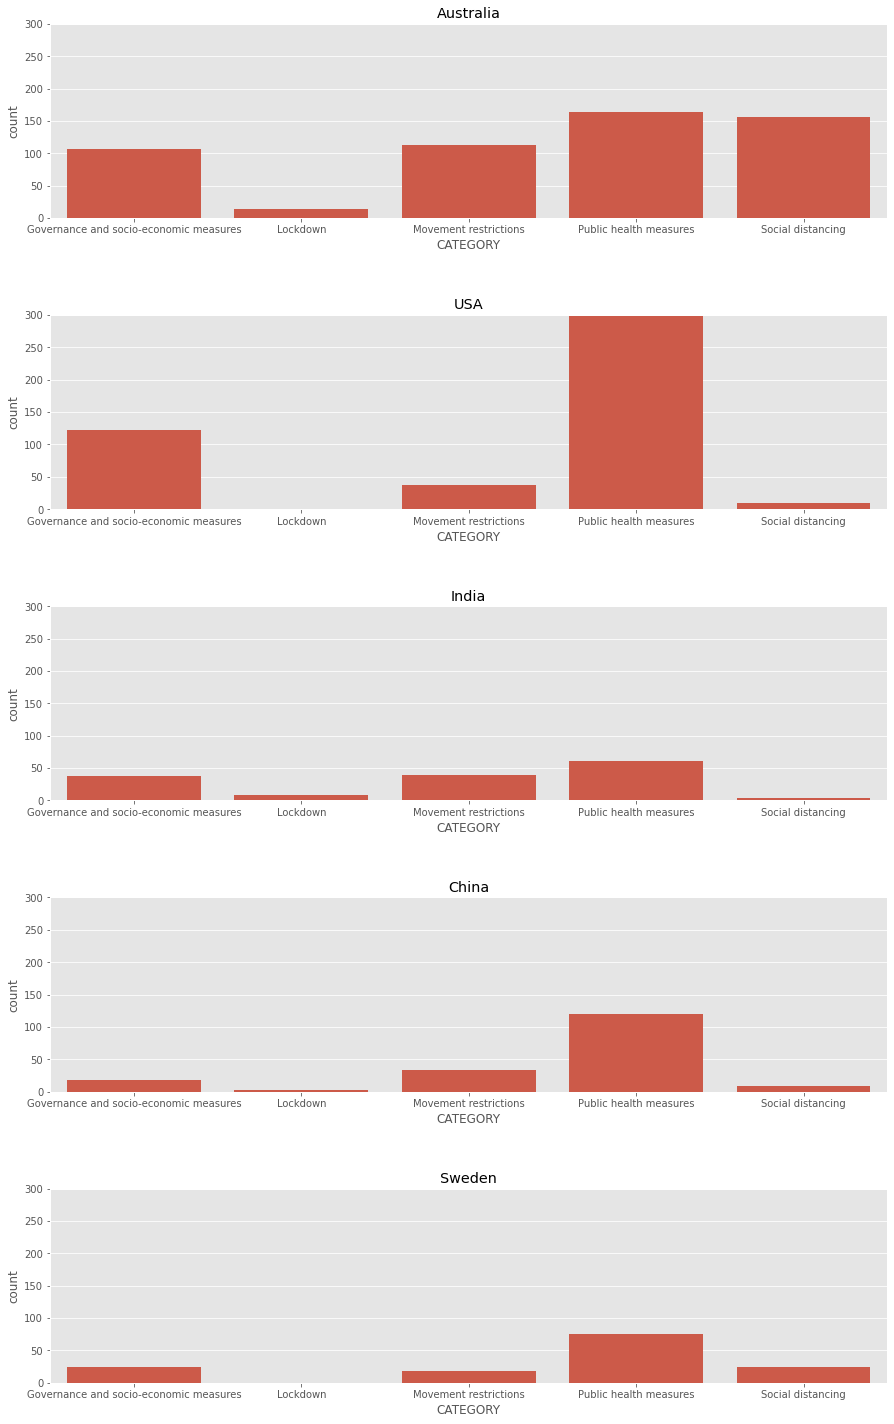

In [97]:
plt.figure(figsize=[15,25])

plt.subplots_adjust(hspace=0.5)

plt.subplot(5,1,1)
sns.countplot(data = df_aus, x = 'CATEGORY', color = colors)
plt.title("Australia")
plt.ylim(0,300)

plt.subplot(5,1,2)
sns.countplot(data = df_usa, x = 'CATEGORY', color = colors)
plt.title("USA")
plt.ylim(0,300)

plt.subplot(5,1,3)
sns.countplot(data = df_india, x = 'CATEGORY', color = colors)
plt.title("India")
plt.ylim(0,300)

plt.subplot(5,1,4)
sns.countplot(data = df_china, x = 'CATEGORY', color = colors)
plt.title("China")
plt.ylim(0,300)

plt.subplot(5,1,5)
sns.countplot(data = df_sweden, x = 'CATEGORY', color = colors)
plt.title("Sweden")
plt.ylim(0,300)

plt.show()

#### Bivariate Exploration

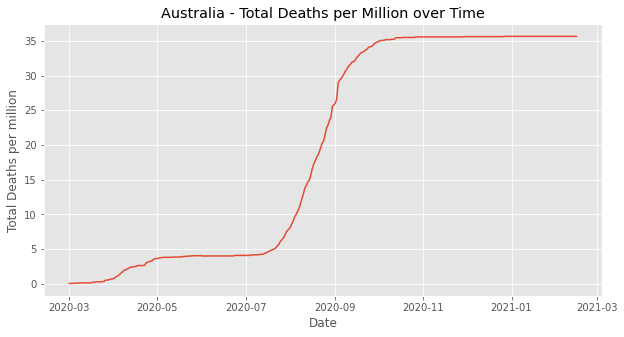

In [109]:
plt.figure(figsize=(10,5))
plt.errorbar(data= df_aus, x = 'DATE',y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Australia - Total Deaths per Million over Time")
plt.show()

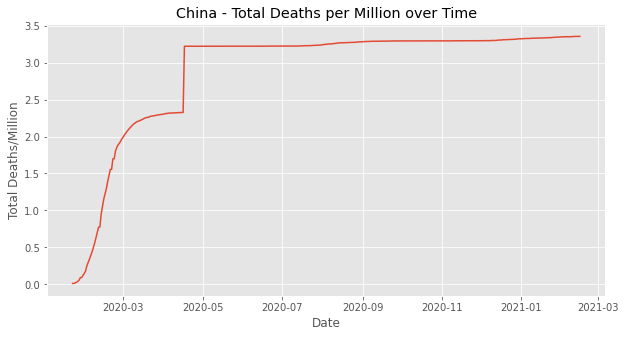

In [111]:
plt.figure(figsize=(10,5))
plt.errorbar(data= df_china, x = 'DATE',y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("China - Total Deaths per Million over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.show()

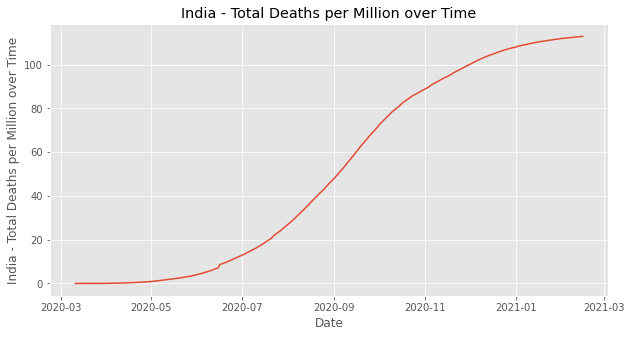

In [112]:
plt.figure(figsize=(10,5))
plt.errorbar(data = df_india, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("India - Total Deaths per Million over Time")
plt.xlabel("Date")
plt.ylabel("Total DEaths / Million")
plt.show()

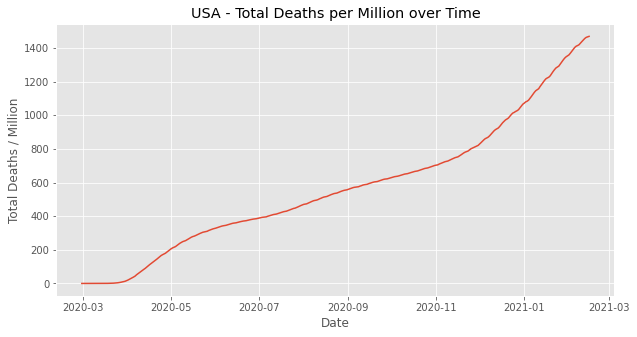

In [113]:
plt.figure(figsize=(10,5))
plt.errorbar(data = df_usa, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("USA - Total Deaths per Million over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.show()

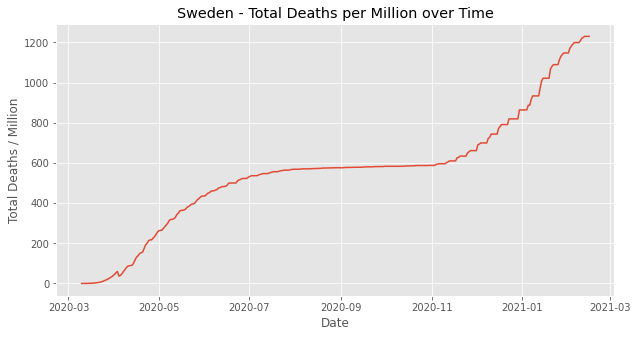

In [115]:
plt.figure(figsize=(10,5))
plt.errorbar(data = df_sweden, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Sweden - Total Deaths per Million over Time")
plt.show()

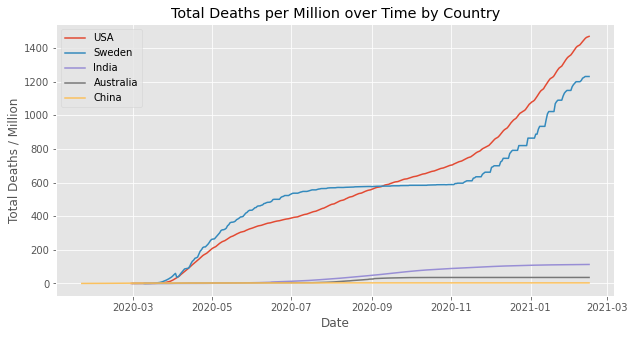

In [117]:
plt.figure(figsize=(10,5))
plt.errorbar(data = df_usa, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = df_sweden, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = df_india, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = df_aus, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = df_china, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths per Million over Time by Country")
plt.legend(labels = ['USA','Sweden','India','Australia','China'])
plt.show()

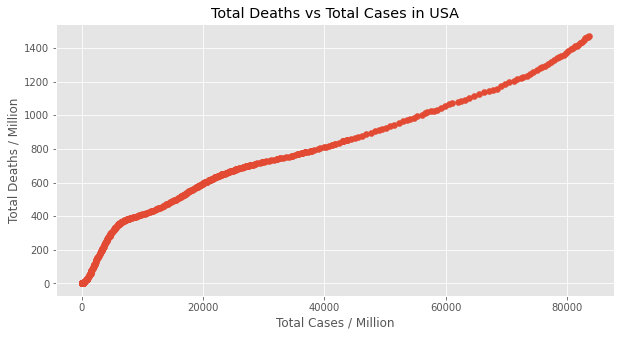

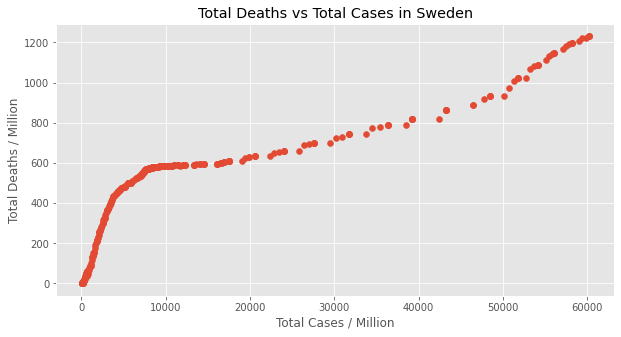

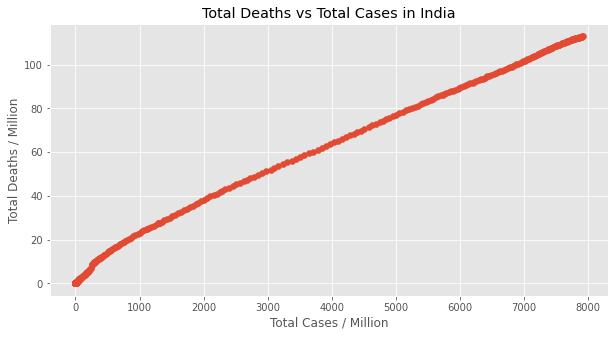

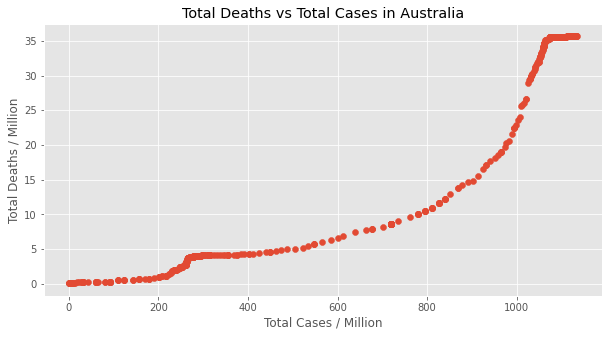

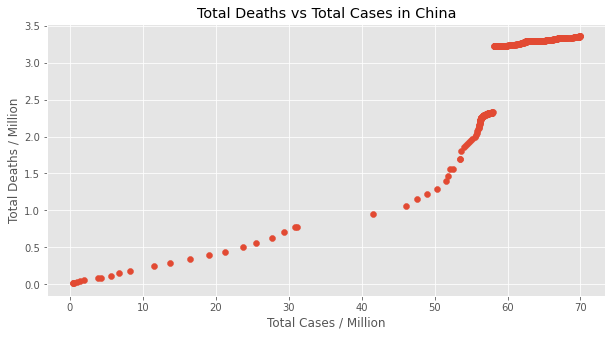

In [126]:
plt.figure(figsize=(10,5))
plt.scatter(data = df_usa, x = 'TOTAL_CASES_PER_MILLION', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("Total Deaths vs Total Cases in USA")
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(data = df_sweden, x = 'TOTAL_CASES_PER_MILLION', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("Total Deaths vs Total Cases in Sweden")
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(data = df_india, x = 'TOTAL_CASES_PER_MILLION', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("Total Deaths vs Total Cases in India")
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(data = df_aus, x = 'TOTAL_CASES_PER_MILLION', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("Total Deaths vs Total Cases in Australia")
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(data = df_china, x = 'TOTAL_CASES_PER_MILLION', y = 'TOTAL_DEATHS_PER_MILLION')
plt.title("Total Deaths vs Total Cases in China")
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.show()


#### Multivariate Exploration

In [132]:
df3.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,CATEGORY,MEASURE
4097,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.157,0.157,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4098,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.196,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4099,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.196,0.000,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4100,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.235,0.039,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN
4101,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.353,0.118,...,10.129,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,NaN,NaN


In [133]:
df3['CATEGORY'].unique()

[NaN, 'Governance and socio-economic measures', 'Movement restrictions', 'Public health measures', 'Social distancing', 'Lockdown']
Categories (5, object): ['Governance and socio-economic measures', 'Lockdown', 'Movement restrictions', 'Public health measures', 'Social distancing']

In [175]:
import datetime as dt

(18316.0, 18383.0)

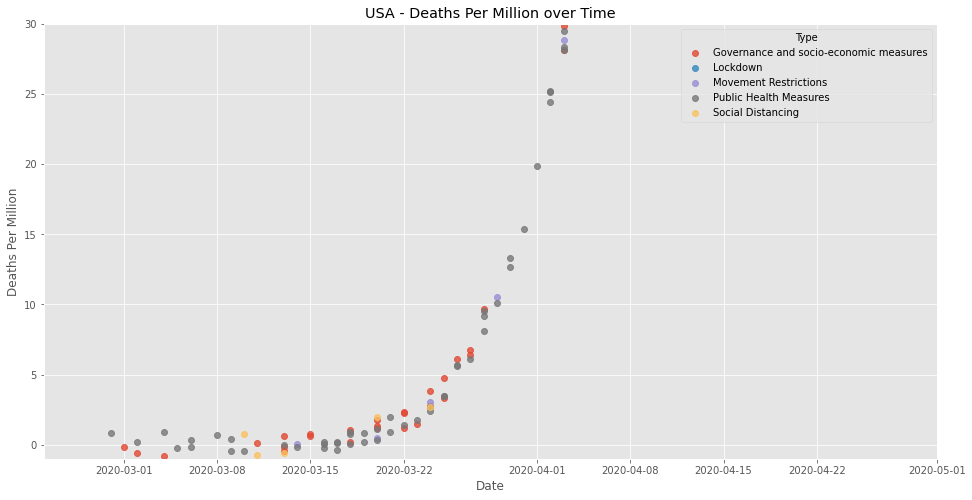

In [178]:
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]

plt.figure(figsize= (16,8))
for measure, marker in measure_markers:
    df_category = df_usa[df_usa['CATEGORY'] == measure].drop_duplicates()
    sns.regplot(data = df_category, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.9)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("USA - Deaths Per Million over Time")

plt.ylim(-1,30)
plt.xlim(dt.date(2020,2,24), dt.date(2020,5,1))


(18316.0, 18475.0)

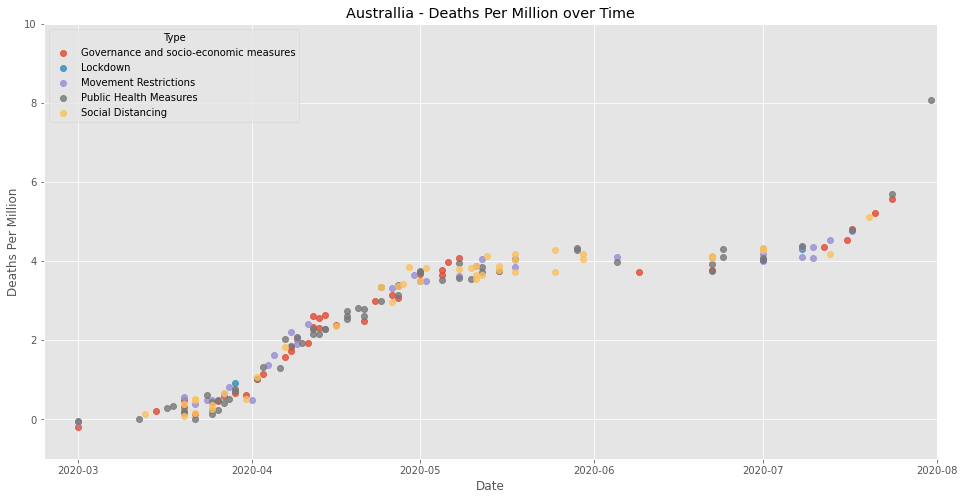

In [181]:
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]

plt.figure(figsize= (16,8))
for measure, marker in measure_markers:
    df_category = df_aus[df_aus['CATEGORY'] == measure].drop_duplicates()
    sns.regplot(data = df_category, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("Australlia - Deaths Per Million over Time")

plt.ylim(-1,10)
plt.xlim(dt.date(2020,2,24), dt.date(2020,8,1))

(18322.0, 18484.0)

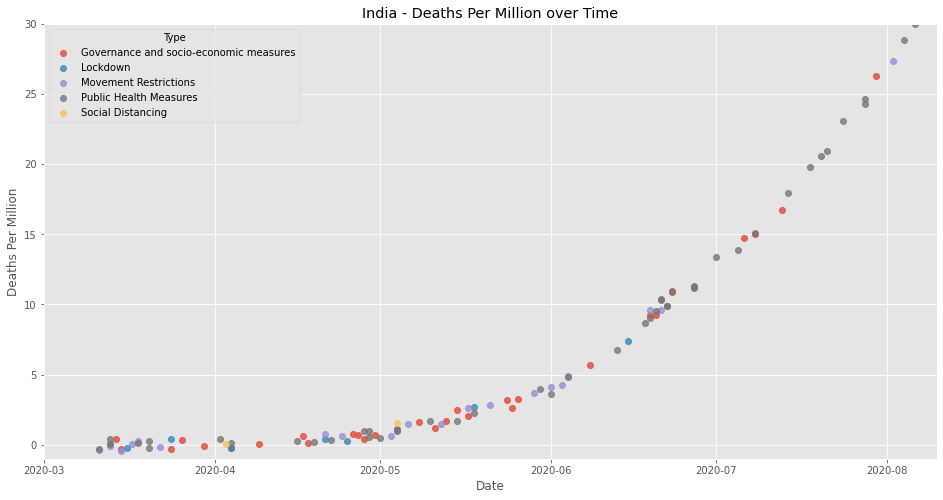

In [172]:
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]

plt.figure(figsize= (16,8))
for measure, marker in measure_markers:
    df_category = df_india[df_india['CATEGORY'] == measure].drop_duplicates()
    sns.regplot(data = df_category, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("India - Deaths Per Million over Time")

plt.ylim(-1,30)
import datetime as dt
plt.xlim(dt.date(2020,3,1),dt.date(2020,8,10))

(18276.0, 18567.0)

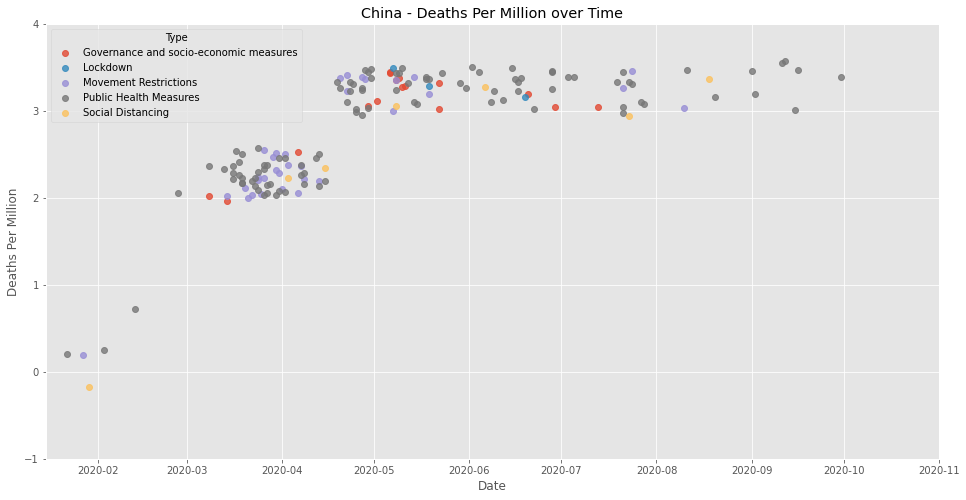

In [188]:
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]

plt.figure(figsize= (16,8))
for measure, marker in measure_markers:
    df_category = df_china[df_china['CATEGORY'] == measure].drop_duplicates()
    sns.regplot(data = df_category, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("China - Deaths Per Million over Time")

plt.ylim(-1,4)
plt.xlim(dt.date(2020,1,15), dt.date(2020,11,1))

(18331.0, 18367.0)

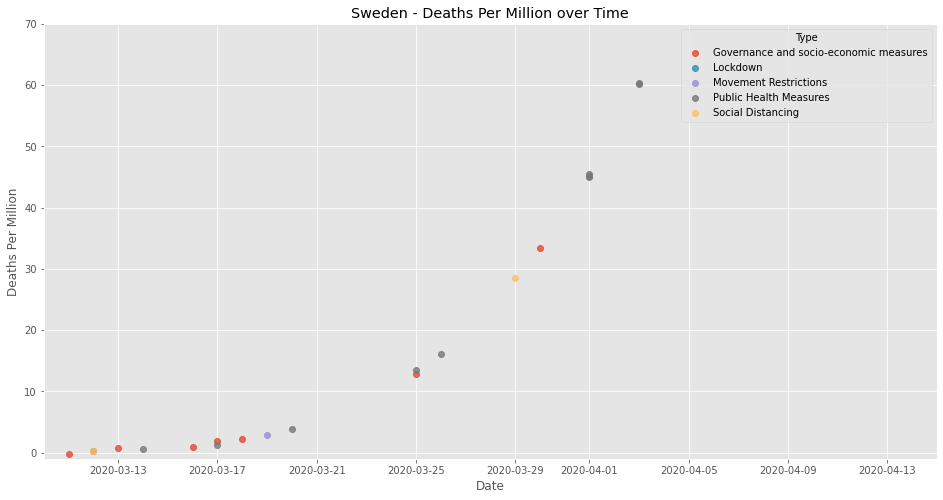

In [191]:
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]

plt.figure(figsize= (16,8))
for measure, marker in measure_markers:
    df_category = df_sweden[df_sweden['CATEGORY'] == measure].drop_duplicates()
    sns.regplot(data = df_category, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("Sweden - Deaths Per Million over Time")

plt.ylim(-1,70)
plt.xlim(dt.date(2020,3,10), dt.date(2020,4,15))